In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()


'C:\\Users\\Amandeep\\Desktop\\ResearchProject\\data-driven-svd-regression\\exploratory_analysis'

# Analyzing the Z-score normalized flu dataset
We will explore the z- score dataset that contains standardized flu signals (`zflu`) for each state,which allows us to compare flu severity across states on the same scale.  

In [5]:
df = pd.read_csv("../analysis_data/hosps_pop_zscore.csv")
print(df.columns)
print(df.shape)
print(df.head())
print(df.isna().sum())

Index(['date', 'location', 'location_name', 'population', 'value', 'season',
       'season_week', 'epiyear', 'epiweek', 'weekly_rate', 'state_mean',
       'state_std', 'zflu'],
      dtype='object')
(9172, 13)
         date location location_name  population  value     season  \
0  2020-10-24       01       Alabama     5108468    3.0  2020/2021   
1  2020-10-31       01       Alabama     5108468   18.0  2020/2021   
2  2020-11-07       01       Alabama     5108468   21.0  2020/2021   
3  2020-11-14       01       Alabama     5108468   25.0  2020/2021   
4  2020-11-21       01       Alabama     5108468   11.0  2020/2021   

   season_week  epiyear  epiweek  weekly_rate  state_mean   state_std  \
0            3     2020       43     0.058165   91.627907  144.899445   
1            4     2020       44     0.348993   91.627907  144.899445   
2            5     2020       45     0.407158   91.627907  144.899445   
3            6     2020       46     0.484712   91.627907  144.899445   
4 

count    9.172000e+03
mean    -2.478998e-17
std      9.971609e-01
min     -7.543188e-01
25%     -5.027219e-01
50%     -4.116734e-01
75%     -1.951356e-03
max      7.014525e+00
Name: zflu, dtype: float64
Axes(0.125,0.11;0.775x0.77)


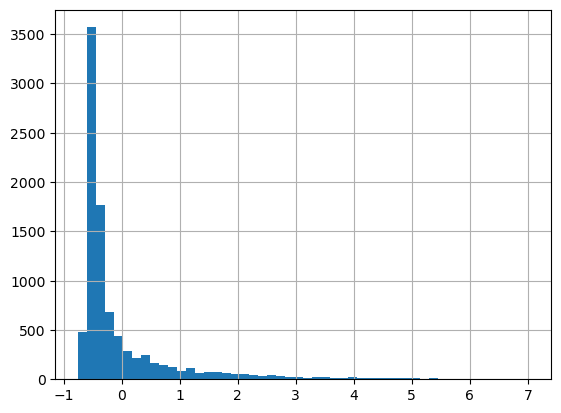

In [6]:
print(df["zflu"].describe())
print(df["zflu"].hist(bins=50))

# Z-score flu values
Since z-scores are standardized, we expect mean near 0 and Occasional extreme spikes.  
Each state's flu series has been normalized relative to its own history, not influenced by population size.

In [9]:
df["location_name"].unique()[:10]

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida'], dtype=object)

# Comparing Two Diofferent States (California Vs Alaska)


Index(['date', 'location', 'location_name', 'population', 'value', 'season',
       'season_week', 'epiyear', 'epiweek', 'weekly_rate', 'state_mean',
       'state_std', 'zflu'],
      dtype='object')


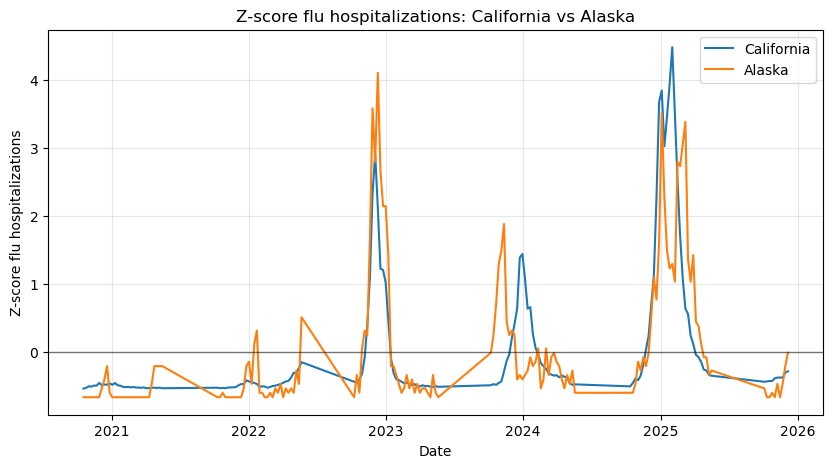

In [12]:
df = pd.read_csv("../analysis_data/hosps_pop_zscore.csv")
df["date"] = pd.to_datetime(df["date"])

states = {
    "06": "California",
    "02": "Alaska"
}

print(df.columns)
plt.figure(figsize=(10, 5))

for code, name in states.items():
    sub = df[df["location"] == code]
    plt.plot(sub["date"], sub["zflu"], label=name)

plt.axhline(0, color="black", linewidth=1, alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Z-score flu hospitalizations")
plt.title("Z-score flu hospitalizations: California vs Alaska")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# CA Vs AK
In this plot we compare z-score flu hospitalization curves for two very different states:
California (large population) and Alaska (small population).

Because we are using z-scores, both states are shown on the same scale,allowing us to compare *relative flu intensity* rather than raw counts.This proves that flu seasons are a shared experience and z-score normaliozation puts states on the same scale.

### Zero Baseline
The horizontal line at zero represents an average flu week for each state.  
Values above zero indicate worse-than-average flu activity, while values below zero indicate milder-than-average flu activity.  
In conclusion, If peak is above zero it means Severe flu seasons and if long periods below zero it means relatively quiet seasons.  

### Extreme z-score spikes

Large positive z-score spikes indicate weeks where flu hospitalizations were far higher than normal for that state.
These spikes often correspond to particularly dangerous flu seasons.  
From this we can say some seasons are extreme outliers and Severity varies year-to-year,even for same state.
